# Shopify - Fall 2021 Data Science Intern Challenge

## Rachel Wong
### Contact Information:
- Email: rachelwong.main@gmail.com
- GitHub: https://github.com/rachelywong

<br/>

## Question 1: 
Given some sample data, write a program to answer the following: click [here](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0) to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [19]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# load in the data
df = pd.read_csv('data.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


#### Exploratory Data Analysis

In [7]:
df.info() # checking for any missing data to see if imputation is required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


No missing data! And we have 5000 records of sales.

In [11]:
round(df.describe(),2) # checking general stats of the features

,order_id,shop_id,user_id,order_amount,total_items
count,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2500.50,50.08,849.09,3145.13,8.79
std,1443.52,29.01,87.80,41282.54,116.32
min,1.00,1.00,607.00,90.00,1.00
25%,1250.75,24.00,775.00,163.00,1.00
50%,2500.50,50.00,849.00,284.00,2.00
75%,3750.25,75.00,925.00,390.00,3.00
max,5000.00,100.00,999.00,704000.00,2000.00


It looks like the average order value (AOV) of $3145.13 was calculated as the mean `order_amount` without taking into consideration outliers that may be pulling the AOV up. We can understand this data more by looking at the standard deviation of `order_amount` where the standard deviation is roughly 41282.54. This is a very large standard deviation, suggesting that the variability in our data is very large (our values vary a lot from the mean) and just taking an average of all the order amounts will skew our AOV.

It's also interesting to note that the average number of `total_items` ordered were 8.79, seems like a lot of sneakers. Also, with all of these shops selling only one model of shoe it's funny that there was an order of 2000 shoes.

We can plot some histograms of the `order_amount` to see the distribution of `order_amount`s that was used to calculate the original AOV.

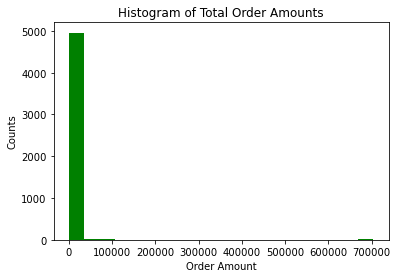

In [35]:
plt.hist(df["order_amount"], density = False, bins = 20, color = 'green')
plt.xlabel("Order Amount")
plt.ylabel("Counts")
plt.title("Histogram of Total Order Amounts")
plt.show()

We can see that the majority of `order_amount`s were below the AOV originally calculated (\\$3145.13). If we zoom in to see the majority orders (show a range from \\$0 to \\$3200 orders which includes the AOV of \\$3145.13), we can see that again the majority of the orders are much lower than the original AOV. This supports the hypothesis that the AOV was pulled up and skewed by outliers, outliers that we can spot from the Histogram of Total Order Amounts (max \\$704000 and others). 

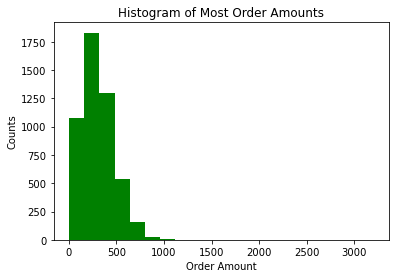

In [38]:
plt.hist(df["order_amount"], range = (0, 3200), density = False, bins = 20, color = 'green')
plt.xlabel("Order Amount")
plt.ylabel("Counts")
plt.title("Histogram of Most Order Amounts")
plt.show()

We can also take a look at a boxplot for a quick sanity check on the histograms. It looks like the outliers are confirmed!

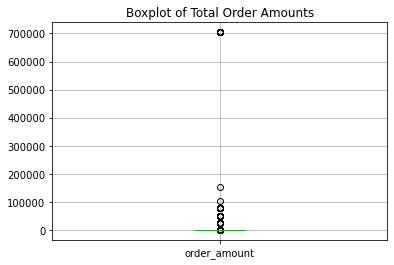

In [66]:
df.boxplot(column='order_amount')
title_boxplot = 'Boxplot of Total Order Amounts'
plt.title(title_boxplot)
plt.show()

Going back to the dataframe, we can take a deeper look at these large `order_amount`s and see the counts of how many large orders there are compared to smaller orders.

In [92]:
ordered_amounts = df.groupby(["order_amount"]).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
ordered_amounts.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


The outliers that we saw earlier in the histograms seem to have quite large order counts. Specifically, \\$704000 order amounts have a count of 17 orders, \\$51450 order amounts have a count of 16, and \\$25725 have a count of 19. Out of 5000 orders, 52 orders (17 + 16 + 19) appear to be outliers. That means that 10.4% of our data are potential outliers, and this may quite possibly be the reason for the large AOV originally calculated, as well as the large standard deviation.

We can take a look at the most common orders as well to further analyze our outlier and strange AOV situation.

In [93]:
ordered_counts = ordered_amounts.sort_values(by='count', ascending=False)
ordered_counts.head(10)

,order_amount,count
28,153,87
87,306,85
108,354,82
90,312,75
33,160,75
31,156,75
92,320,72
21,142,72
96,328,68
141,459,67


Reordering the table to show the most common `order_amount`s, we can see that the most orders (mode) are amounts of \\$153, and the other more common orders are lower than \\$500. This is pretty interesting to see because our original AOV suggests that the average order is \\$3145.13 which is extremely different from the majority or orders.

### b) What metric would you report for this dataset?

Based on the exploratory data analysis above, I would be more inclined to report the median and the mode for this dataset along with the mean (original AOV). 

Using the median, we have a metric that is more robust to outliers since it does not depend on all values in the dataset. This is a solution that does not require us removing outliers since removing the outliers may negatively affect or bias our true results. Without any further information about the specifications for what our AOV needs to tell us, it's difficult to determine the impact of removing outliers. We could filter outliers based on past information. For example, if our AOV in previous years (our current dataset is all from 2017) showed to be around \\$300, we could potentially filter out `order_amount` values above \\$300. This would likely change our AOV to be a more appropriate value.

Using the mode, we have a metric that summarizes the most frequently occuring order amount, an important measure of central tendency. If we can understand the mode as being the most common orders, we can recommend clients to work towards increasing their modal orders. This is because these are the order types that are most commonly being ordered. While larger orders may be more profitable, it may be important for clients to also strategize how they can increase the values of their most common orders.

In combination, we can look at the mean, median, and mode as metrics to evaluate how best to strategize our shoe selling!

### c) What is its value?

In [99]:
median = int(df["order_amount"].median())
print(f"The median of the original dataset is ${median}.")
mode = df["order_amount"].mode()
print(f"The mode of the original dataset is ${mode[0]}.")

The AOV calculated from the median of the original dataset is $284.
The AOV calculated from the mode of the original dataset is $153.


In [118]:
df_outliers_removed = df[df["order_amount"] < median]
round(df_outliers_removed["order_amount"].describe(), 2)

count    2447.00
mean      176.51
std        50.16
min        90.00
25%       138.00
50%       163.00
75%       202.00
max       282.00
Name: order_amount, dtype: float64

We can see that after filtering for values below the median that the AOV is now \\$176.51 with a standard deviation of 50.16 which is much more reasonable.

In [120]:
mean = round(df["order_amount"].mean(), 2)
print(f"The original AOV calculated from the mean of the original dataset is ${mean}.")
mean_outliers_removed = round(df_outliers_removed["order_amount"].mean(), 2)
print(f"The AOV calculated from the mean of the filtered dataset is ${mean_outliers_removed}.")

The original AOV calculated from the mean of the original dataset is $3145.13.
The AOV calculated from the mean of the filtered dataset is $176.51.


### Extra Information

I wanted to take a deeper look into the outliers to understand if it makes sense to remove them in my filtering process, and also to see who is ordering 2000 shoes. Earlier, I found that \\$704000, \\$51450, and \\$25725 order amounts seemed to be the major outliers.

In [128]:
outliers = [704000, 51450, 25725]
outliers_df = df.loc[df['order_amount'].isin(outliers)].sort_values(['order_amount', 'created_at'], ascending=[False, False]) # sort by order_amount and created_at
outliers_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00


Intersting. It looks like the same user is purchasing 2000 shoes at the same time each order. Maybe this is a shop owner purchasing supplies or someone who really loves shoes. Also, the user purchasing the largest `order_amount` (\\$704000) is purchasing from the same shop each time and are purchasing 2000 units each time. What I find strange about this is that sometimes their orders are at the exact same time but are split into different order IDs. We can see this with their most recent purchases below.

In [131]:
outliers_df.head(3)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00


This could potentially be because of how the shop operates to split the different shoe orders apart. However, this could also be a reason why our outliers show prominently in the original AOV calculation since we now have 3 values of \\$704000 instead of one value of \\$2112000 for that day.

<br/>

## Question 2: 
For this question you’ll need to use SQL. Follow this [link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### a) How many orders were shipped by Speedy Express in total?

``` sql
SELECT COUNT(DISTINCT OrderID) FROM Orders
INNER JOIN Shippers
ON Orders.ShipperID = Shippers.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express';
``` 

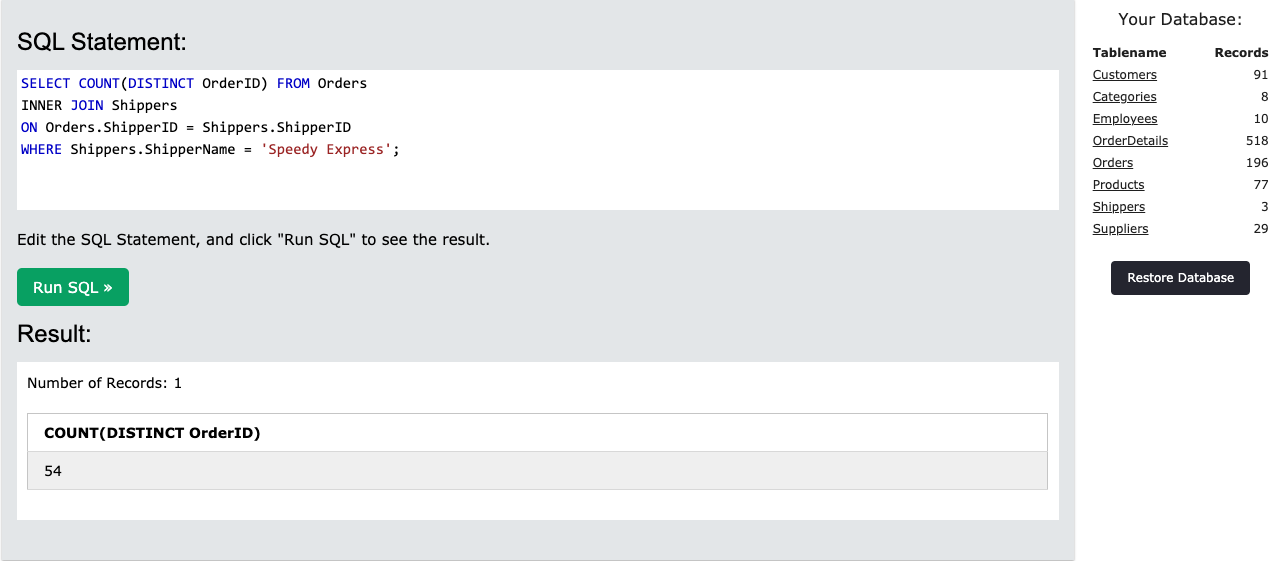

There are `54` orders shipped by Speedy Express in total.

Thought process:
I joined the table Orders and Shippers on ShipperID to merge the two tables together since Orders had the number of orders and Shippers had the ShipperID of Speedy Express. From there, I selected the orders where the ShipperID was from Speedy Express, and made sure to count distinct orders only.

### b) What is the last name of the employee with the most orders?

``` sql
SELECT LastName FROM Employees
JOIN Orders 
ON Employees.EmployeeID = Orders.EmployeeID
GROUP BY LastName
ORDER BY COUNT(OrderID) DESC
LIMIT 1;
```

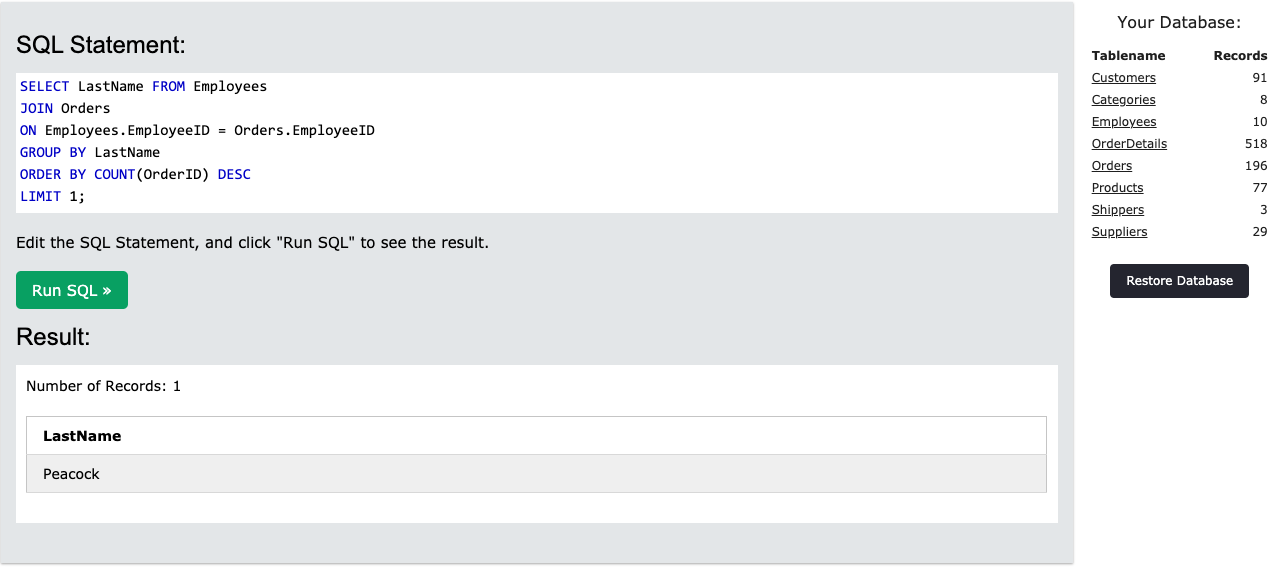

The last name of the employee with the most orders is `Peacock`.

Thought process:
To find the last name of the employees, I selected for the LastName from the Employees table. I then joined the Employees table with the Orders table on EmployeeID and grouped by the LastName so that I could order the query by the number of orders (OrderIDs). I then ordered the query in a descending manner and limited the query to only output the first row, leaving us with the last name of the employee with the most orders.


### c) What product was ordered the most by customers in Germany?

``` sql
SELECT ProductName
FROM (
SELECT ProductName, ProductID, SUM(Quantity) AS TotalQuantity
FROM (
SELECT *
FROM Products
LEFT OUTER JOIN OrderDetails
ON Products.ProductId = OrderDetails.ProductId
LEFT OUTER JOIN Orders
ON OrderDetails.OrderID = Orders.OrderID
LEFT OUTER JOIN Customers
ON Orders.CustomerID = Customers.CustomerID
WHERE Country = 'Germany'
)
GROUP BY ProductID
ORDER BY TotalQuantity DESC
)
LIMIT 1;
```

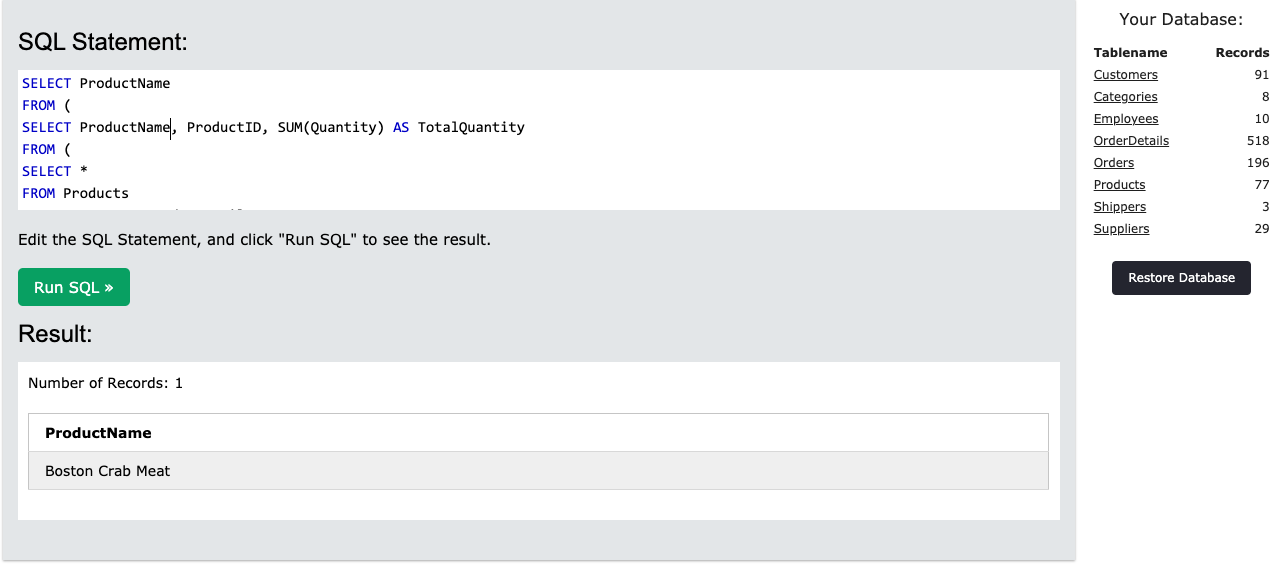

The product ordered most by customers in Germany is `Boston Crab Meat`.

Thought process:
Looking through the different tables, I determined that to find the most purchased product from customers in Germany, we would need to get the customers’ information from the Customers table and the ProductName from the Products table. In order to connect these, we would need to join the tables using the Orders and OrderDetails tables. Below is a sketch of the connections we would need for this to work. After joining all 4 tables together, we had all the information we needed to answer the question (highlighted columns). I joined Customers where the country = ‘Germany’ and grouped by ProductID so that we could calculate the sum of the Quantity column. From there, I ordered the query by Quantity (descending) and limited by 1 to get the product ordered the most by customers in Germany. 

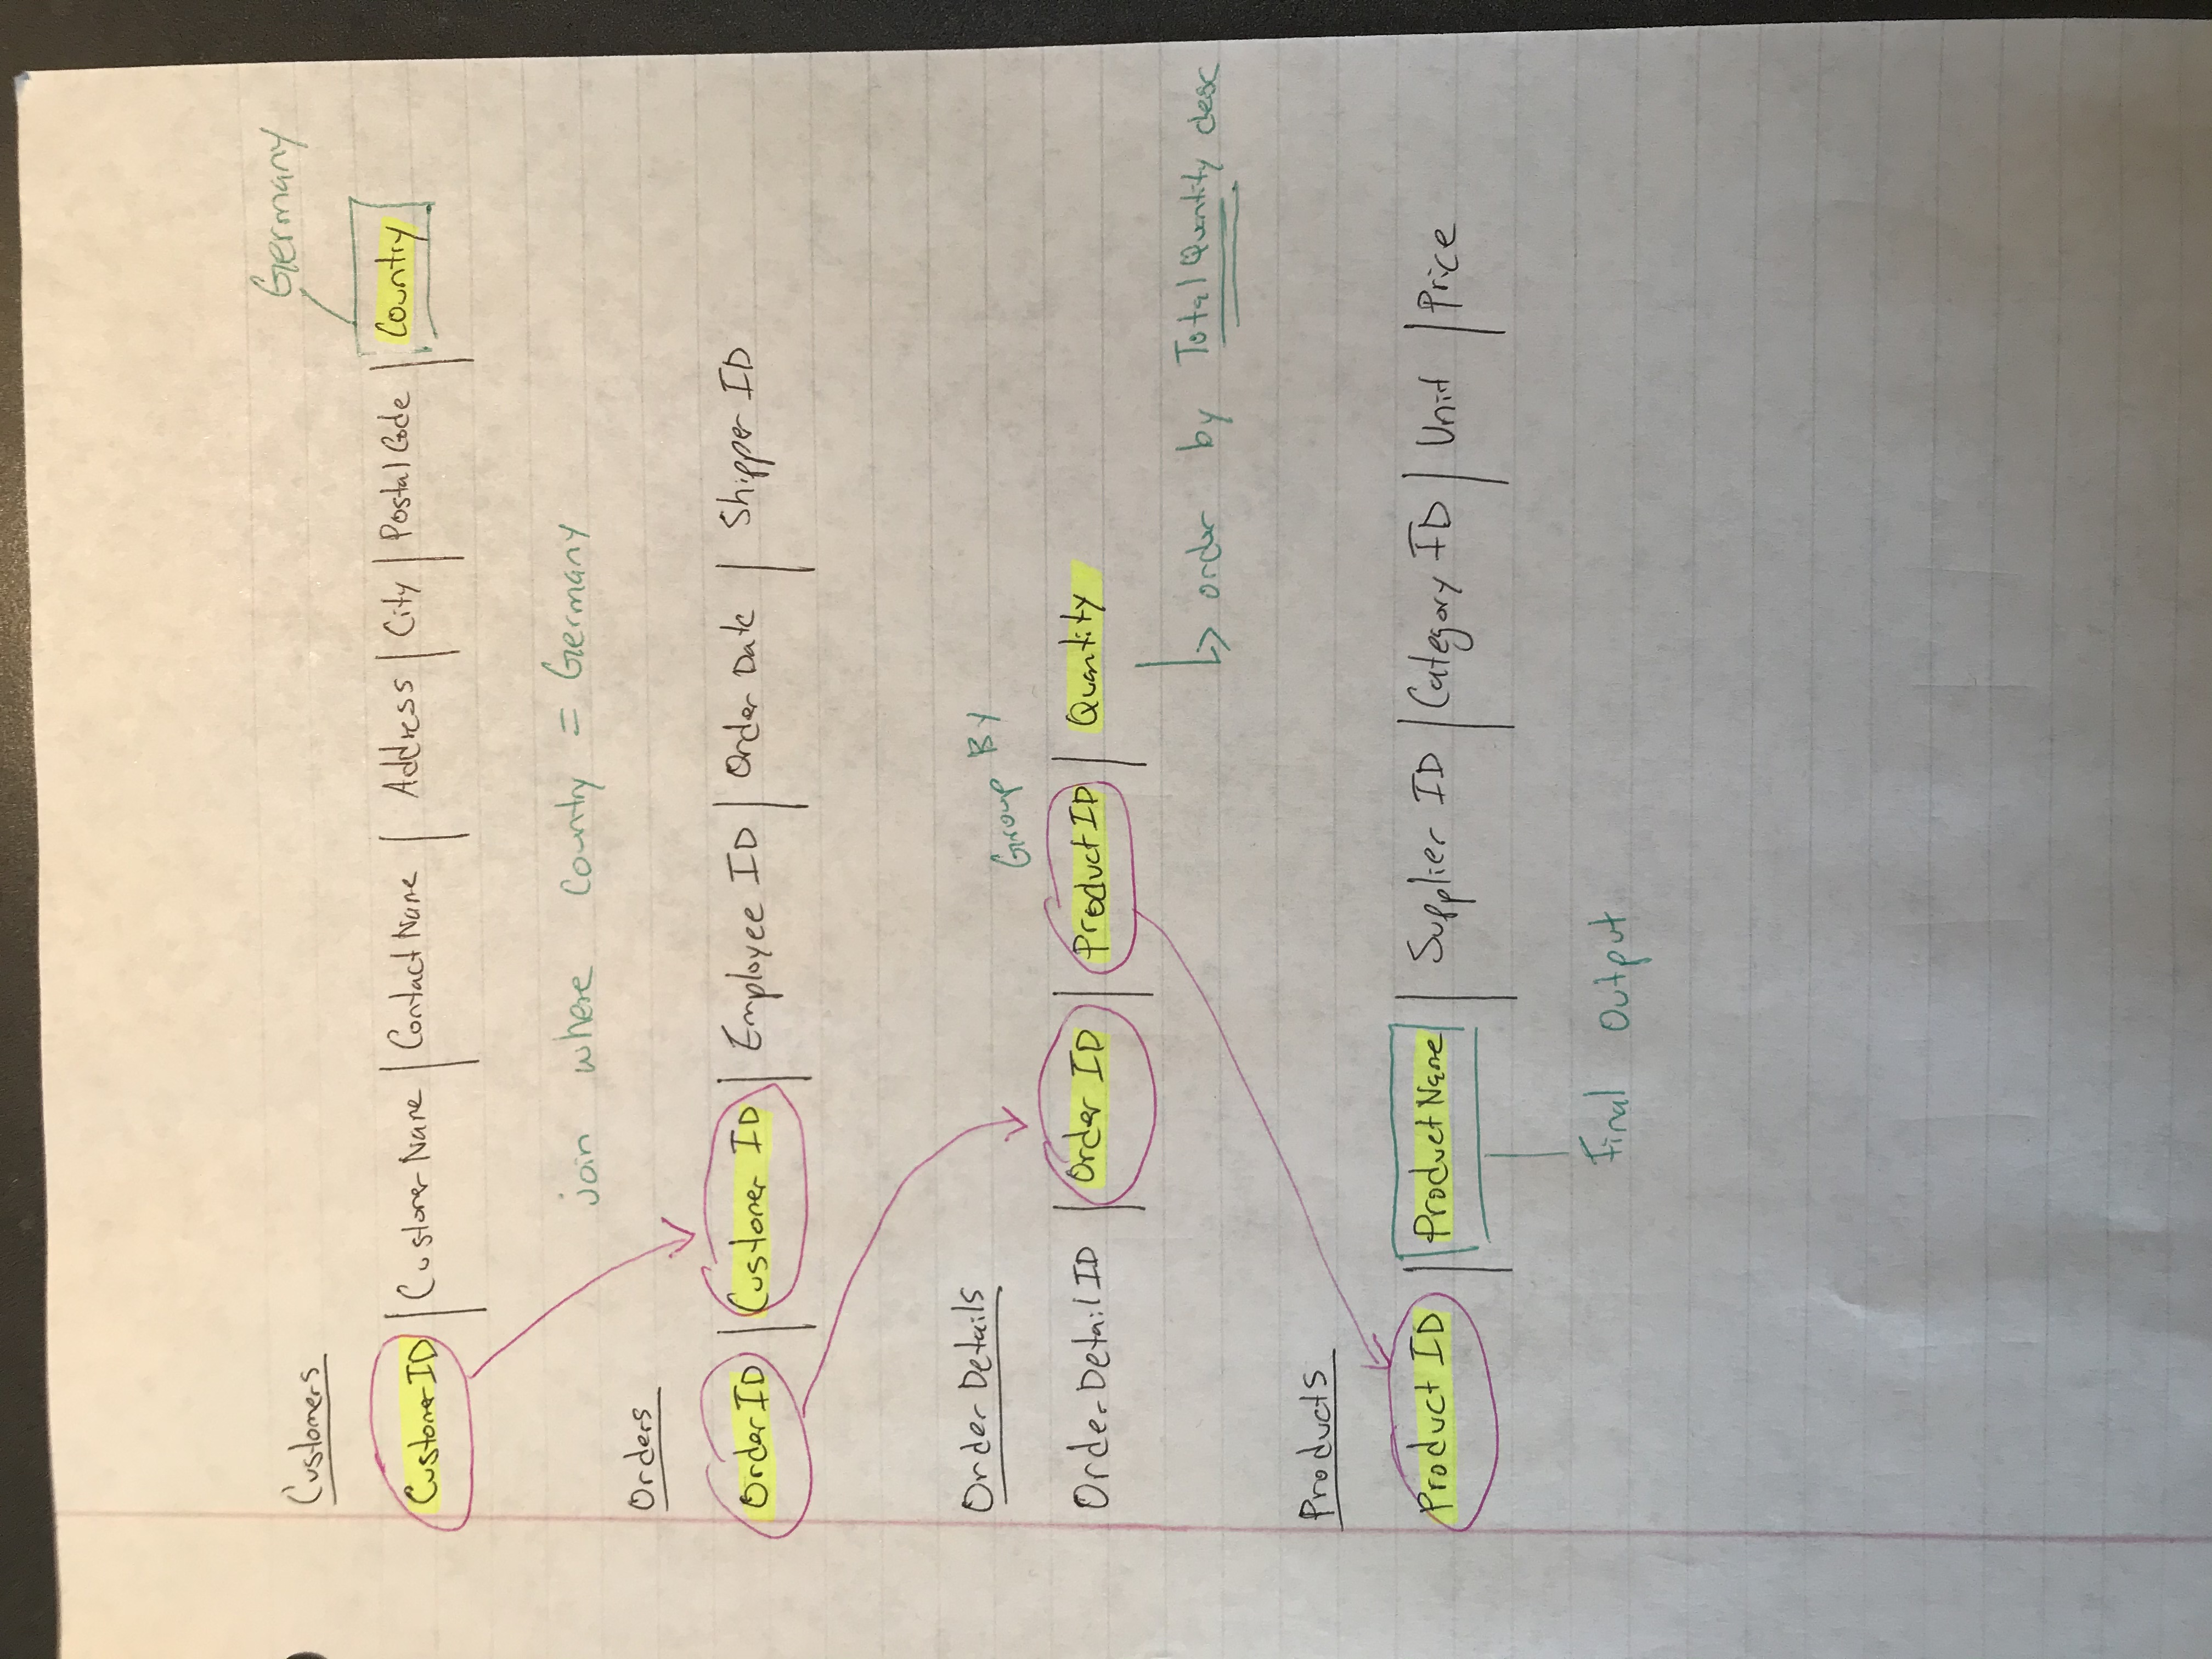